In [46]:
import random
import matplotlib.pyplot as plt

doors = ["A", "B", "C"] # 문을 세 개 만들자
prize = random.choice(doors) # 문 세 개 중에 하나를 랜덤하게 선택하자
# 실험자는 차가 어디 있는지 몰라야 함 (print 하지 말 것)
# 실험자가 문을 선택하자
choice = doors[0] # 여기서는 첫 번째 문을 선택해 봤다.

def MC(mychoice, prize):
 """
 진행자 함수.
 내가 선택한 답과 정답인 문을 MC에게 알려주면,
 내가 선택한 답과 정답이 아닌 문을 하나 알려준다.
 """
 candidates = ["A", "B", "C"] # 후보 리스트를 하나 만들자

 if mychoice == prize: # 만약 내 선택과 정답이 같으면
     candidates.remove(prize) # 후보 리스트에서 정답을 지우자
 else: # 내 선택이 정답과 같지 않으면
     candidates.remove(prize) # 후보 리스트에서 정답을 지우고
     candidates.remove(mychoice) # 후보 리스트에서 내 답을 지우자
 return random.choice(candidates) # 이제 남아 있는 후보 중에 랜덤하게 선택해서 return 하자.


In [44]:
# MC에게 내 선택과 정답을 알려주면,
# 내가 선택하지 않은 문 중에서 정답이 아닌 문을 하나 보여준다.
MC(choice, prize)

'C'

In [65]:
# 그럼 이제 당신은 선택을 바꿀 것인가?
print(choice, prize)

A B


In [67]:
# 내 답을 바꾸지 않는 실험
for i in range(10):
 doors = ["A", "B", "C"]

 print(":: 실험", i)

 # 먼저 차가 있는 곳을 결정짓고
 prize = random.choice(doors)

 # 문을 하나 선택하자
 # 여기서는 첫 번째 문을 선택했다.
 mychoice = doors[0]

 # 진행자가 문을 하나 열어 보여주자
 opened_door = MC(mychoice, prize)

 # 내 답을 유지해 보자
 # 그럼 아무 것도 안하면 된다
 if mychoice == prize:
     print("당첨!")
 else:
     print("실패..")

:: 실험 0
실패..
:: 실험 1
실패..
:: 실험 2
실패..
:: 실험 3
실패..
:: 실험 4
실패..
:: 실험 5
실패..
:: 실험 6
당첨!
:: 실험 7
실패..
:: 실험 8
실패..
:: 실험 9
실패..


In [75]:
# 함수로 만들기 -선택을 바꾸지 않는 함수
def no_change():
    doors = ["A","B","C"]

    prize = random.choice(doors)  # 먼저 차가 있는 곳을 결정
    mychoice = doors[0]  # 내가 문을 직접 하나 선택 (여기서는 첫번째 문)

    opened_door = MC(mychoice, prize)  # 진행자가 문을 하나 열어서 염소를 보여줄 것

    if mychoice == prize:  # 내 선택이 정답일때(선택을 유지할때)
        return 1
    else :  # 선택을 바꿨다고 했을때 0을 반환
        return 0

# 이제부터 실험을 100번 해서 몇 번 맞았는지 테스트
value = 0  # 0부터 시작 (100번 시도)
for _ in range(100):
    value = value + no_change()  # 내 선택을 유지하면 1을 더하고 아니면 0을 더함    
print(value, '/100')

33 /100


In [84]:
# 위 실험을 100번 시행한 결과값을 모두 출력

result = [] # 최종 결과값을 넣을 리스트를 만들자
for _ in range(100):
    value = 0

    for _ in range(100):
        value += no_change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.

    result.append(value) # 실험 결과값을 result에 넣어주자.

result[:10]

[36, 35, 31, 27, 31, 39, 36, 35, 32, 39]

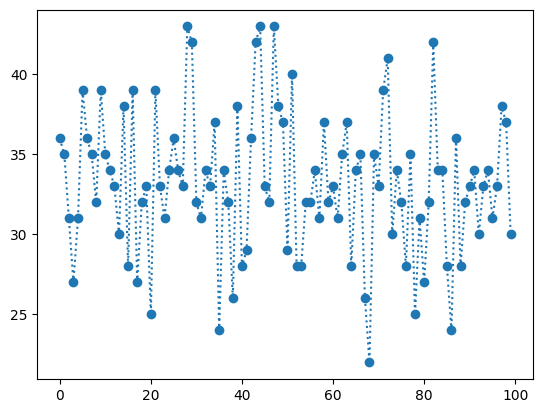

In [87]:
plt.plot(result, 'o:')

In [68]:
# 내 답을 바꾸는 실험
for i in range(10):
 doors = ["A", "B", "C"]

 print(":: 실험", i)

 # 먼저 차가 있는 곳을 결정짓고
 prize = random.choice(doors)

 # 문을 하나 선택하자
 # 여기서는 첫 번째 문을 선택했다.
 mychoice = doors[0]

 # 진행자가 문을 하나 열어 보여주자
 opened_door = MC(mychoice, prize)

 # 내 답을 바꾸자!
 doors.remove(mychoice) # doors에서 내 최초 선택을 제거
 doors.remove(opened_door) # doors에서 진행자가 보여준 문 제거

 mychoice = doors[0] # doors에 남은 선택은 오직 하나이므로 [0]번째 선택

 # 정답 체크해 보자
 if mychoice == prize:
     print("당첨!")
 else:
     print("실패..")

:: 실험 0
당첨!
:: 실험 1
당첨!
:: 실험 2
당첨!
:: 실험 3
실패..
:: 실험 4
당첨!
:: 실험 5
당첨!
:: 실험 6
당첨!
:: 실험 7
당첨!
:: 실험 8
당첨!
:: 실험 9
당첨!


In [91]:
# 함수로 만들기 -선택을 바꾸는 함수

def change():
    doors = ["A", "B", "C"]

    prize = random.choice(doors)  # 먼저 차가 있는 곳을 결정짓고
    mychoice = doors[0]

    opened_door = MC(mychoice, prize)  # 진행자가 문을 하나 열어 보여주자

    # 내 답을 바꾸자!
    doors.remove(mychoice) # doors에서 내 최초 선택을 제거
    doors.remove(opened_door) # doors에서 진행자가 보여준 문 제거

    mychoice = doors[0] # doors에 남은 선택은 오직 하나이므로 [0]번째 선택

    if mychoice == prize:
        return 1 # 내 선택이 정답이면 1을 반환
    else:
        return 0 # 내 선택이 틀리면 0을 반환

# 실험을 100번 해서 몇 번 맞았는지 테스트를 해보자
value = 0
for _ in range(100):
 value += no_change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.
print(value, '/ 100')

37 / 100


In [95]:
# 100번 시행하는 실험을 100번 실행해 보자.
result = [] # 최종 결과값을 넣을 리스트를 만들자
for _ in range(100):
    value = 0
    for _ in range(100):
        value += no_change() # 내 선택이 정답이면 1을 더하고, 내 선택이 틀리면 0을 더한다.
    result.append(value) # 실험 결과값을 result에 넣어주자.

result[:10]

[40, 40, 22, 30, 34, 29, 28, 34, 36, 31]

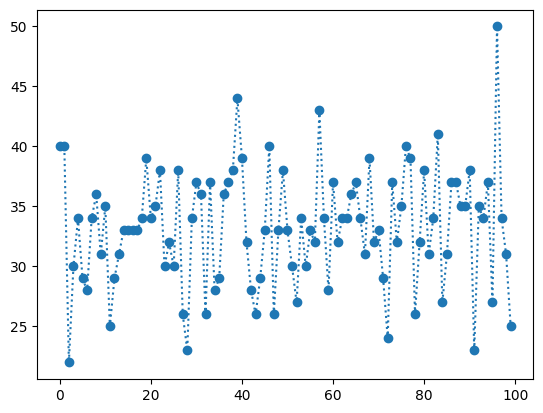

In [96]:
plt.plot(result, 'o:')

In [118]:
result_change = []
result_nochange = []

# 선택을 바꿨을 때
for _ in range(100):
    value = 0
    for _ in range(100):
        value += change()
    result_change.append(value)

# 선택을 유지했을 때
for _ in range(100):
    value = 0
    for _ in range(100):
        value += no_change()
    result_nochange.append(value)

Text(0, 0.5, '? / 100')

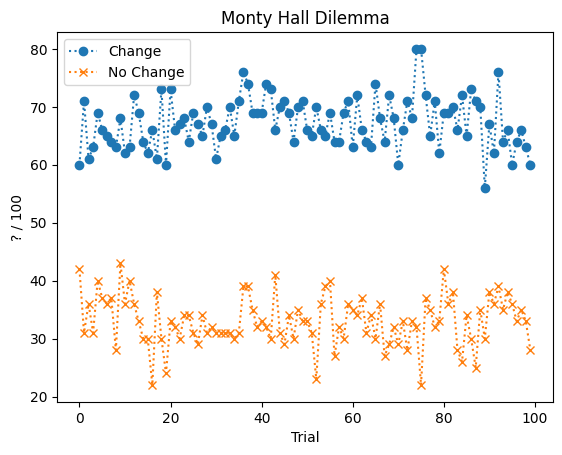

In [124]:
plt.plot(result_change, 'o:', label='Change')  # 'o' 형태의 점선 그래프를 plot한다, change라벨 붙임
plt.plot(result_nochange, 'x:', label='No Change')
plt.legend()  # 그래프에 범례를 추가
plt.title('Monty Hall Dilemma')
plt.xlabel('Trial')
plt.ylabel('? / 100')

In [111]:
# 많이 돌려보기

result_change = []
result_nochange = []

# 선택을 바꿨을 때
for _ in range(10000):
    value = 0
    for _ in range(100):
        value += change()
    result_change.append(value)

# 선택을 유지했을 때
for _ in range(10000):
    value = 0
    for _ in range(100):
        value += no_change()
    result_nochange.append(value)

Text(0, 0.5, '? / 100')

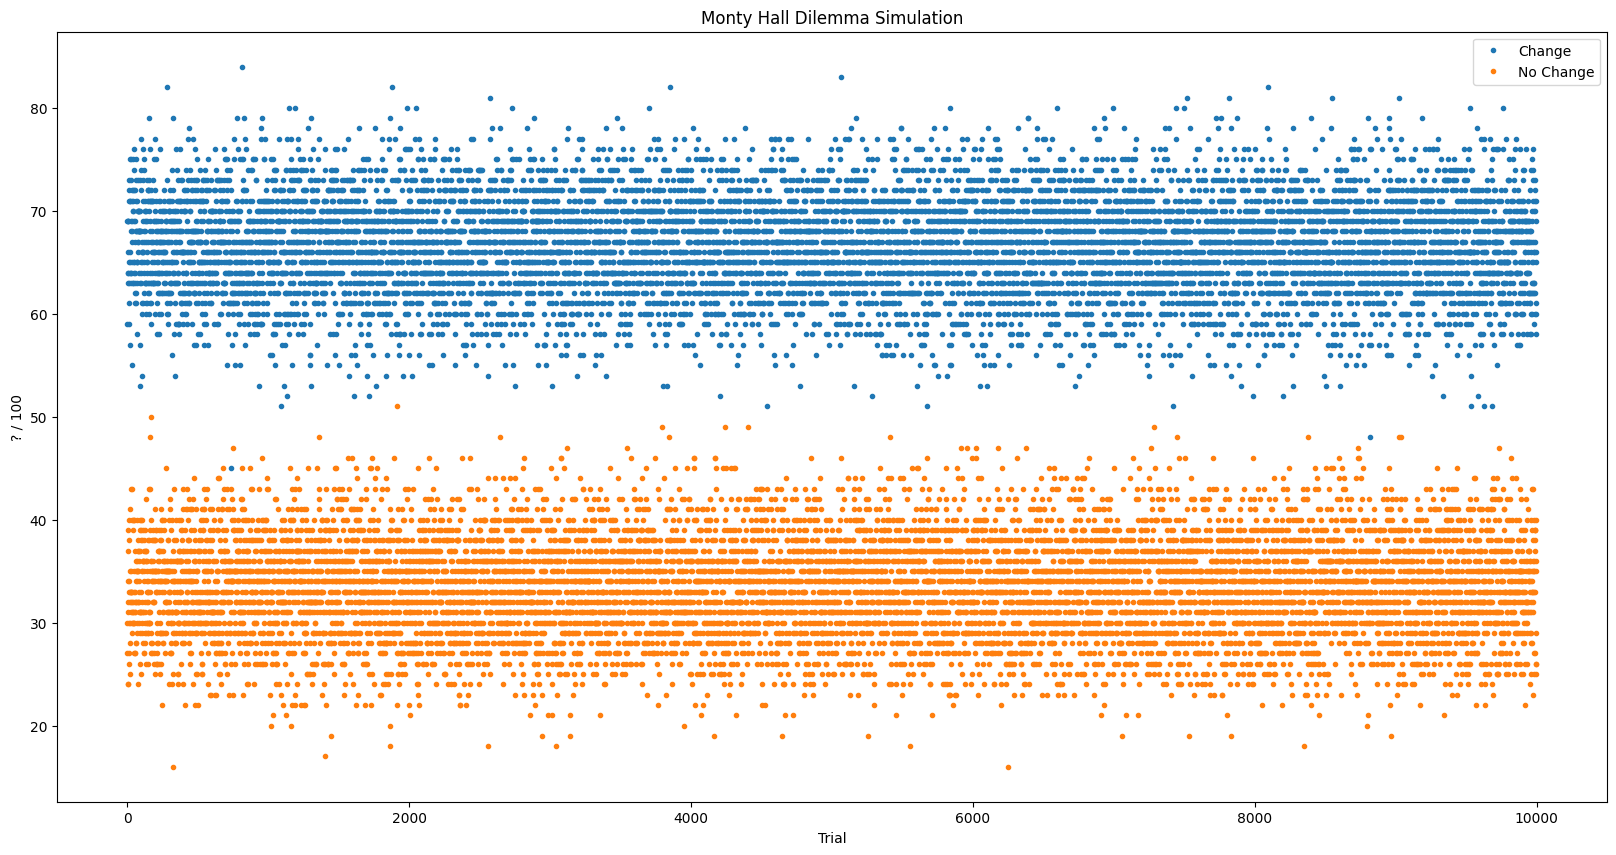

In [112]:
plt.figure(figsize=(20, 10))
plt.plot(result_change, '.', label='Change')
plt.plot(result_nochange, '.', label='No Change')
plt.legend()
plt.title('Monty Hall Dilemma Simulation')
plt.xlabel('Trial')
plt.ylabel('? / 100')

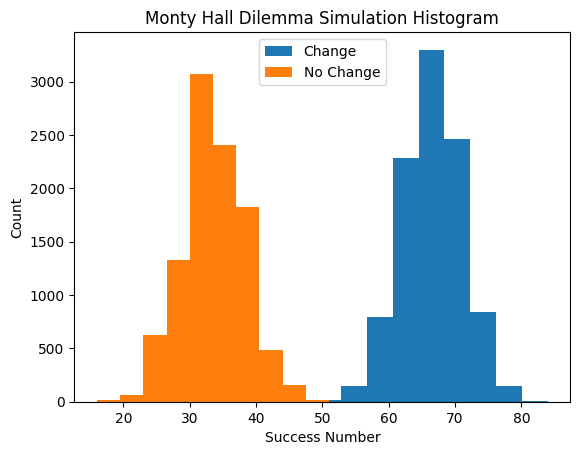

In [113]:
plt.hist(result_change, label='Change');
plt.hist(result_nochange, label='No Change');
plt.legend()
plt.title('Monty Hall Dilemma Simulation Histogram');
plt.xlabel('Success Number');
plt.ylabel('Count');

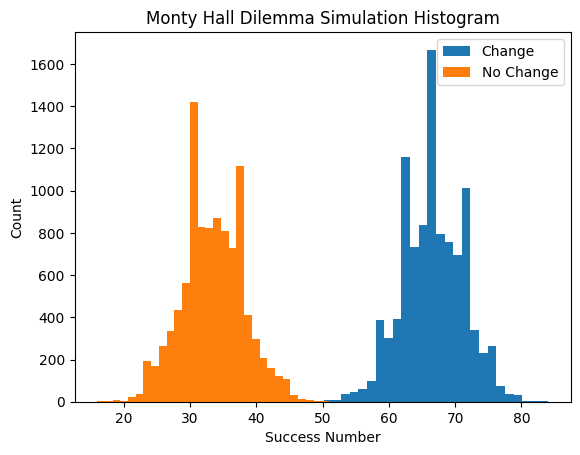

In [114]:
plt.hist(result_change, label='Change', bins=30);
plt.hist(result_nochange, label='No Change', bins=30);
plt.legend()
plt.title('Monty Hall Dilemma Simulation Histogram');
plt.xlabel('Success Number');
plt.ylabel('Count');